In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import lbg_forecast.hyperparameters as hyp
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.colour_cuts as cuts
import lbg_forecast.priors as pr
import lbg_forecast.population_model as pop
import lbg_forecast.sps as sps
import lbg_forecast.selection as sel
import fsps

In [3]:
hyperparameter_mu_bounds = np.array([[-2.5, 0.5],  #logzsol
                                [0.0, 2.0],      #dust1
                                [0.0, 4.0],      #dust2
                                [-1.0, 0.4],     #dust_index
                                [1.0, 1.0],      #igm_factor 
                                [-4.0, -1.0],    #gas_log_u
                                [-5.0, 1.0],     #log10(fagn)
                                [5, 150],        #agn_tau
                                [2, 10],         #nu
                                [0.1, 1.0]       #sig
])

hyperparameter_sigma_max = np.array([[0.01, 3.0], #logzsol
                                    [0.01, 2.0], #dust1
                                    [0.01, 4.0], #dust2
                                    [0.01, 0.5], #dust_index
                                    [0.01, 2.0], #igm_factor 
                                    [0.01, 3.0], #gas_log_u
                                    [0.01, 6.0], #log10(fagn)
                                    [0.1, 145]   #agn_tau
])

redshift_mass_prior_parameters = pr.setup_redshift_and_mass_priors(z_max=12)

In [4]:
prior_parameters = hyp.sample_prior_parameters(1, hyperparameter_mu_bounds, hyperparameter_sigma_max)
sps_parameters = pop.generate_sps_parameters(1000, prior_parameters[0], redshift_mass_prior_parameters)

In [5]:
photometry = sps.simulate_photometry(sps_parameters, 'suprimecam', nebem=False, zhistory=False)

Starting Run 1/3
libraries:  (b'mist', b'miles', b'DL07')
Run 1/3 Complete
Complete


In [12]:
colours = sel.calculate_colours(photometry)
print(fsps.find_filter('suprimecam')[1:2]+fsps.find_filter('suprimecam')[3:])

['suprimecam_g', 'suprimecam_r', 'suprimecam_i', 'suprimecam_z']


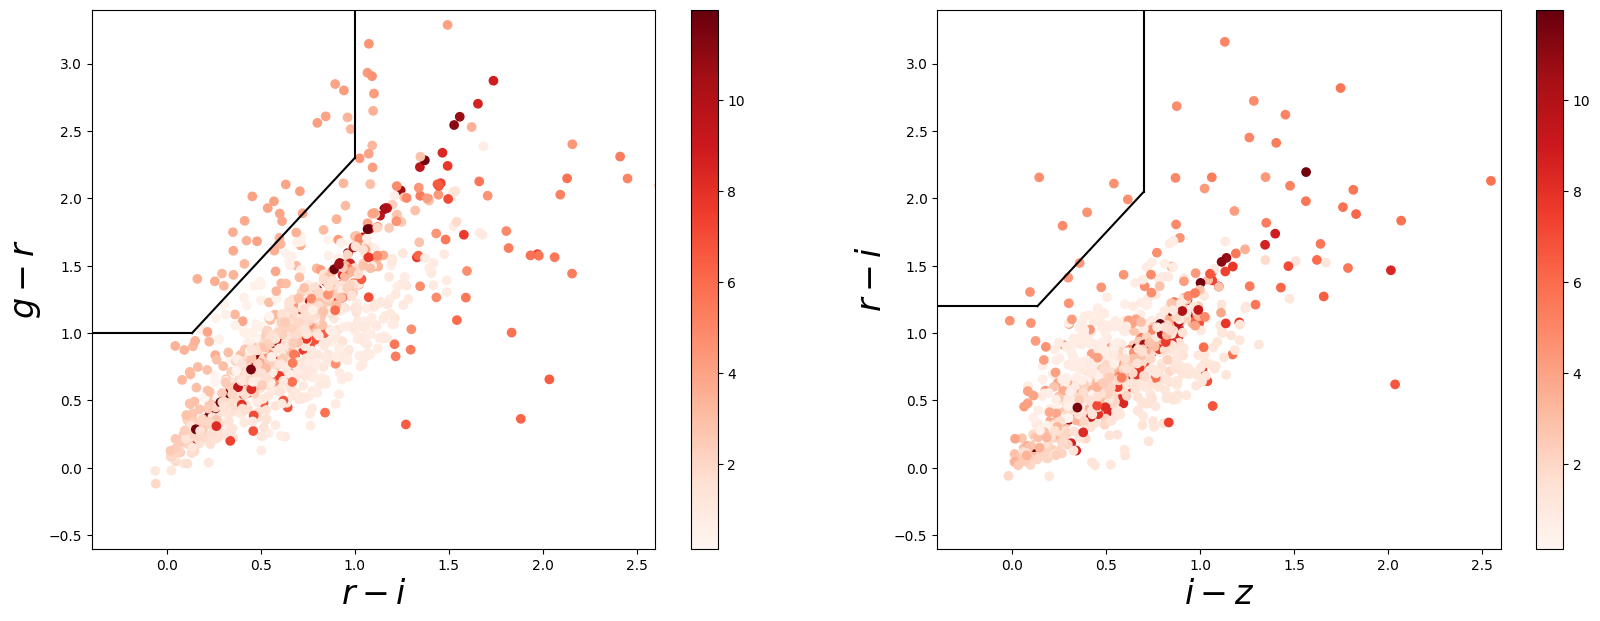

In [15]:
full_colour_map_u, ax = plt.subplots(1, 2, figsize=(20, 7))
ax1 = ax[0]
ax2 = ax[1]

#g colour cuts
x_range1 = np.linspace(-1,(1.0-0.8)/1.5,10)
x_range2 = np.linspace((1.0-0.8)/1.5, 1.0, 10)
y_range1 = np.linspace(2.3, max(colours[:,0]), 10)
y_range2 = np.linspace(1.0, max(colours[:,0]), 10)   

gplot = ax1.scatter(colours[:,1], colours[:,0], c=sps_parameters[:, 0], cmap="Reds")
ax1.set_xlabel("$r - i$", fontsize=24)
ax1.set_ylabel("$g - r$", fontsize=24)
ax1.set_xlim(-0.4, 2.6)
ax1.set_ylim(-0.6, 3.4)
plt.colorbar(gplot, ax=ax1)

ax1.plot(x_range1, cuts.g_cut1(x_range1), color = 'k')
ax1.plot(cuts.g_cut2(y_range1), y_range1, color = 'k')
ax1.plot(cuts.g_cut3(y_range2), y_range2, color = 'k')
ax1.plot(x_range2, cuts.g_cut4(x_range2), color = 'k')

#r colour cuts
x_range1 = np.linspace(-1,(1.2-1.0)/1.5,10)
x_range2 = np.linspace((1.2-1.0)/1.5, 0.7, 10)
y_range1 = np.linspace(2.05, max(colours[:,1]), 10)
y_range2 = np.linspace(1.2, max(colours[:,1]), 10)    

rplot = ax2.scatter(colours[:,2], colours[:,1], c=sps_parameters[:, 0], cmap="Reds")
ax2.set_xlabel("$i - z$", fontsize=24)
ax2.set_ylabel("$r - i$", fontsize=24)
ax2.set_xlim(-0.4, 2.6)
ax2.set_ylim(-0.6, 3.4)
plt.colorbar(rplot, ax=ax2)

ax2.plot(x_range1, cuts.r_cut1(x_range1), color = 'k')
ax2.plot(cuts.r_cut2(y_range1), y_range1, color = 'k')
ax2.plot(cuts.r_cut3(y_range2), y_range2, color = 'k')
ax2.plot(x_range2, cuts.r_cut4(x_range2), color = 'k')

Galaxy Age (Gyr): 0.07000000000000002
Age of the universe at given redshift (Gyr): 1.210089837997164
Redshift: 4.933341581180882
Observed Metallicity (Absolute Metallicity): 0.0028400000000000005


(array([4.49043428e-05, 2.83999201e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.84000000e-03,
        2.84000000e-03, 2.84000000e-03, 2.84000000e-03, 2.840000

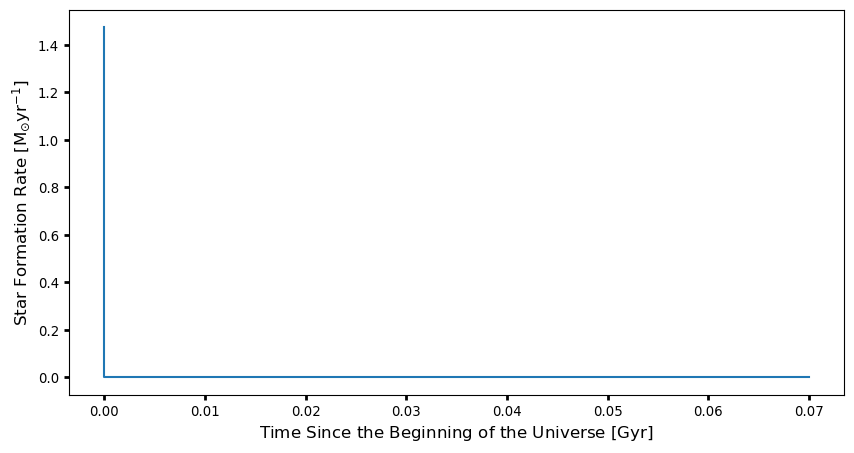

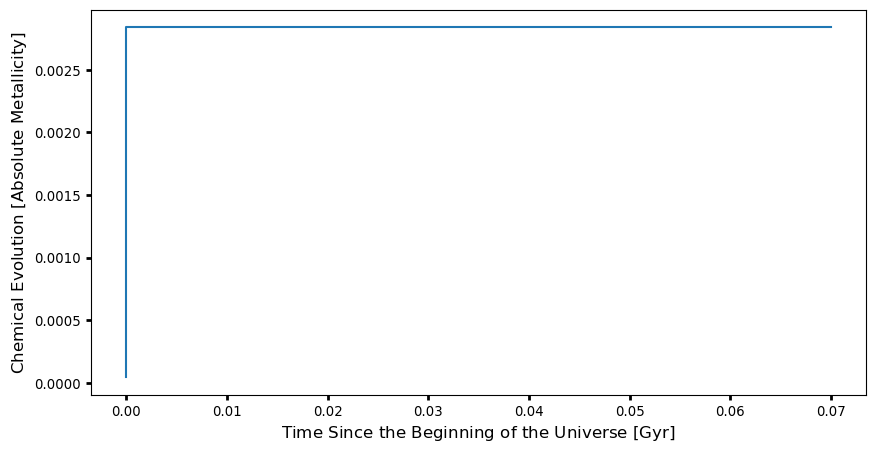

In [ ]:
tools.sfh_zhis_diag(spsparams, 0)

In [ ]:
a = np.load('generated_photo_final.npy')
b = np.load('generated_photo_neb.npy')
c = np.load('generated_photo_no_neb.npy')
d = np.load('generated_photo_zhis_no_neb.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'generated_photo_final.npy'